In [1]:
##Step 0: Import Libraries

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
##Step 1: Read the Dataset

df=pd.read_csv("Train.csv")
df1 = df.copy(deep=True)
df1.shape


(8068, 11)

In [3]:
df1.head(6)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
round(df1.describe())

,ID,Age,Work_Experience,Family_Size
count,8068.0,8068.0,7239.0,7733.0
mean,463479.0,43.0,3.0,3.0
std,2595.0,17.0,3.0,2.0
min,458982.0,18.0,0.0,1.0
25%,461241.0,30.0,0.0,2.0
50%,463472.0,40.0,1.0,3.0
75%,465744.0,53.0,4.0,4.0
max,467974.0,89.0,14.0,9.0


In [6]:
df1.head(1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D


In [7]:
##Step 2: Clean Data
#columns:
df1.columns = df1.columns.str.strip().str.lower()
df1.head(1)

,id,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size,var_1,segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D


In [8]:
df1.dtypes

id                   int64
gender              object
ever_married        object
age                  int64
graduated           object
profession          object
work_experience    float64
spending_score      object
family_size        float64
var_1               object
segmentation        object
dtype: object

In [9]:
df1.var_1.describe()

count      7992
unique        7
top       Cat_6
freq       5238
Name: var_1, dtype: object

In [10]:
##Step 2: Clean Data
#Rows:
#Check Null Value
#Check Formats
#Check Duplicates
#Check Data Ranges
#Drop un-necessary columns
df1.drop('id', axis=1 , inplace=True)
df1.drop('var_1', axis=1 , inplace=True)

df1.head(1)

,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size,segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D


In [11]:
df1.duplicated().sum()

719

In [12]:
df1.duplicated(keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
8063    False
8064    False
8065     True
8066    False
8067    False
Length: 8068, dtype: bool

In [13]:
 df2= df1.drop_duplicates(keep='last')
df2

,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size,segmentation
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A
5,Male,Yes,56,No,Artist,0.0,Average,2.0,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C
...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


In [14]:
df2.duplicated().sum()

0

In [15]:
df2.isnull().sum()

gender               0
ever_married       140
age                  0
graduated           77
profession         123
work_experience    786
spending_score       0
family_size        326
segmentation         0
dtype: int64

In [16]:
round((df2.isnull().sum() / df2.shape[0])* 100, 1)

gender              0.0
ever_married        1.9
age                 0.0
graduated           1.0
profession          1.7
work_experience    10.7
spending_score      0.0
family_size         4.4
segmentation        0.0
dtype: float64

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7349 entries, 1 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7349 non-null   object 
 1   ever_married     7209 non-null   object 
 2   age              7349 non-null   int64  
 3   graduated        7272 non-null   object 
 4   profession       7226 non-null   object 
 5   work_experience  6563 non-null   float64
 6   spending_score   7349 non-null   object 
 7   family_size      7023 non-null   float64
 8   segmentation     7349 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 574.1+ KB


In [18]:
#Handling the missing value by depending on the data type of columns

df_clean =df2.fillna({
    
         'ever_married':df2.ever_married.mode()[0],
          'profession' :df2.profession.mode()[0],
            'graduated':df2.graduated.mode()[0],
            'family_size':df2.family_size.mean(),
           "work_experience":df2.work_experience.mean(),
            
})

In [19]:
df_clean.isnull().sum()

gender             0
ever_married       0
age                0
graduated          0
profession         0
work_experience    0
spending_score     0
family_size        0
segmentation       0
dtype: int64

<Figure size 1080x576 with 0 Axes>

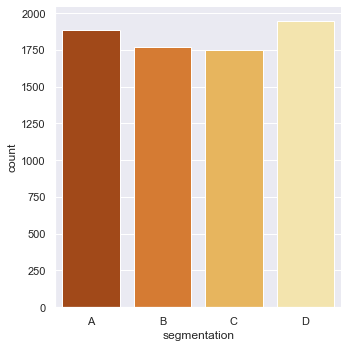

In [20]:
##Step 3: Explore Data (EDA)
#Visulazing the distibution of the Target
# My target is segmentation
sns.set(style='darkgrid')
plt.figure(figsize=(15,8))
sns.catplot (x = 'segmentation', data = df_clean, color = '#333652', kind='count',palette='YlOrBr_r' );

<AxesSubplot:xlabel='age', ylabel='Count'>

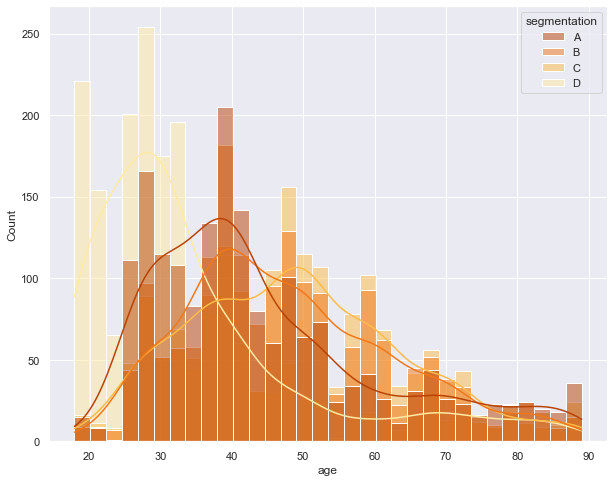

In [21]:
plt.figure(figsize=(10,8))
sns.histplot(x = 'age', data = df_clean, hue='segmentation', palette= "YlOrBr_r", kde= True)

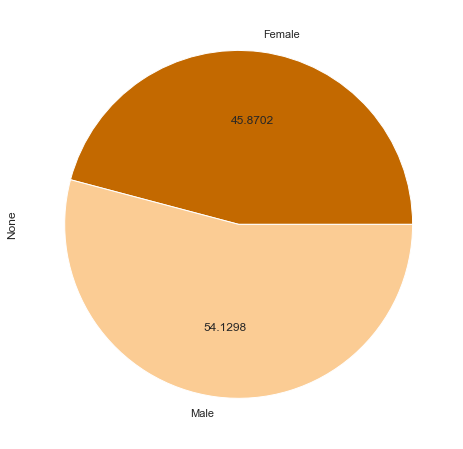

In [22]:
figure = plt.figure(figsize=(8,8) )
df_clean.groupby('gender').size().plot(kind='pie', autopct='%.4f', colors=["#c36900","#fbcc94","b"]);

In [23]:
df2.head(1)

,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size,segmentation
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A


<AxesSubplot:ylabel='gender,spending_score'>

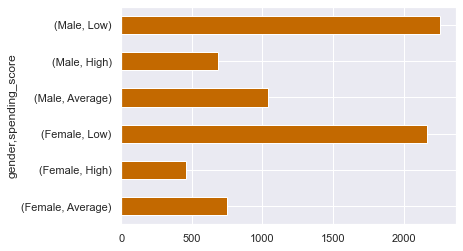

In [24]:
df_clean.groupby(['gender','spending_score'])[['spending_score']].count().plot(kind = 'barh', legend=False, color='#c36900')

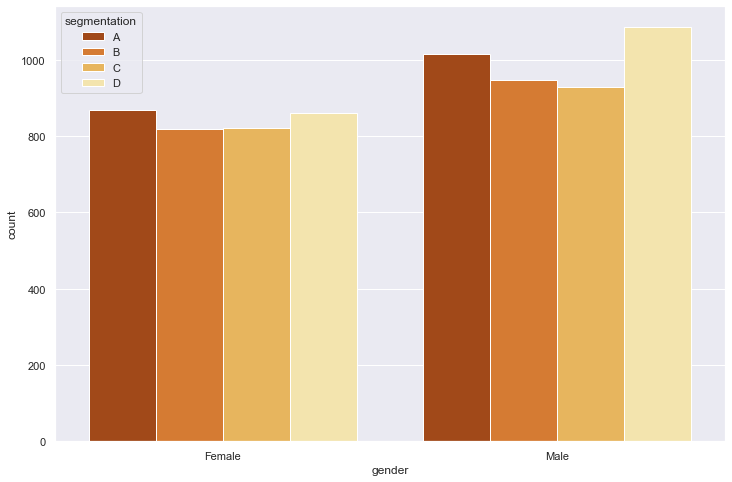

<Figure size 864x576 with 0 Axes>

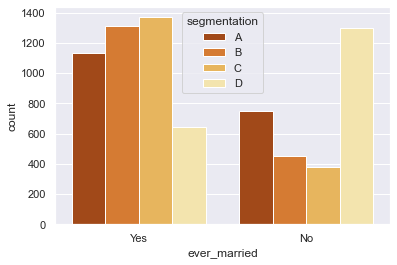

<Figure size 864x576 with 0 Axes>

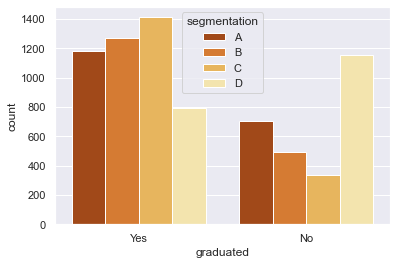

<Figure size 864x576 with 0 Axes>

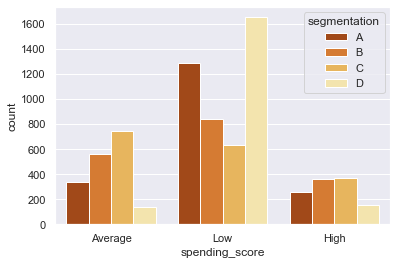

<Figure size 864x576 with 0 Axes>

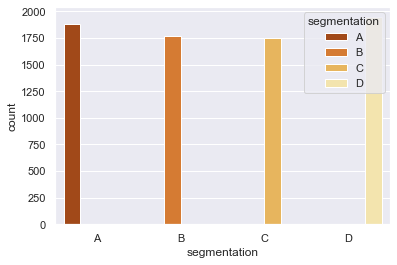

<Figure size 864x576 with 0 Axes>

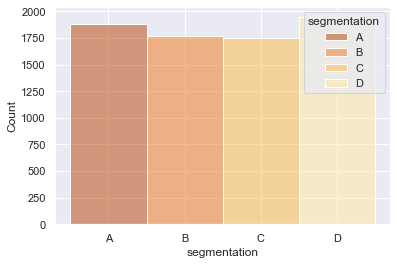

In [25]:
plt.figure(figsize=(12,8))
for col in df_clean.columns:
     if df_clean[col].nunique() <= 4:
        sns.countplot(x= col ,data= df_clean, hue='segmentation' , palette= "YlOrBr_r")
        plt.figure(figsize = (12,8))
        plt.show()
        
else:
        sns.histplot(x= col ,data= df_clean, hue='segmentation',palette= "YlOrBr_r", kde=True)
        plt.show()

In [26]:
df_clean.head(1)

,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size,segmentation
1,Female,Yes,38,Yes,Engineer,2.794301,Average,3.0,A


In [27]:
x={'A':1,'B':2,'C':3,'D':4}
df_clean.segmentation=df_clean.segmentation.map(x)

In [28]:
#Step 4 Modeling
#Step 4.1: Preprocessing
#Create dummy cols for Categorical cols
#Create X & Y
#Split Data into Train vs Test
#Standerdize the Dataset

df1 = pd.get_dummies(df_clean, drop_first=True)
df1

,age,work_experience,family_size,segmentation,gender_Male,ever_married_Yes,graduated_Yes,profession_Doctor,profession_Engineer,profession_Entertainment,profession_Executive,profession_Healthcare,profession_Homemaker,profession_Lawyer,profession_Marketing,spending_score_High,spending_score_Low
1,38,2.794301,3.0,1,0,1,1,0,1,0,0,0,0,0,0,0,0
2,67,1.000000,1.0,2,0,1,1,0,1,0,0,0,0,0,0,0,1
4,40,2.794301,6.0,1,0,1,1,0,0,1,0,0,0,0,0,1,0
5,56,0.000000,2.0,3,1,1,0,0,0,0,0,0,0,0,0,0,0
6,32,1.000000,3.0,3,1,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22,0.000000,7.0,4,1,0,0,0,0,0,0,0,0,0,0,0,1
8064,35,3.000000,4.0,4,1,0,0,0,0,0,1,0,0,0,0,0,1
8065,33,1.000000,1.0,4,0,0,1,0,0,0,0,1,0,0,0,0,1
8066,27,1.000000,4.0,2,0,0,1,0,0,0,0,1,0,0,0,0,1


In [29]:
# Create X & Y

x = df1.drop(columns ='segmentation',axis=1)
y = df1.segmentation

In [30]:
from sklearn.model_selection  import train_test_split
from sklearn.metrics import recall_score, f1_score, precision_score


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [31]:
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.linear_model import LogisticRegression

# 1. Create object 

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
print("The Model Accuracy is {:.2f}%,\
      Recall is {:.2f}%, Percision is {:.2f}%, \
      F1-Score is {:.2f}% ".format(lr_model.score(x_test, y_test )*100,
                                    recall_score(y_test,y_pred, average='micro')*100 ,
                                   precision_score(y_test,y_pred , average='micro')*100, 
                                  f1_score(y_test,y_pred ,average='micro') *100
))

The Model Accuracy is 46.80%,      Recall is 46.80%, Percision is 46.80%,       F1-Score is 46.80% 


C:\Users\RT\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
print("The Model Accuracy is {:.2f}%,\
      Recall is {:.2f}%, Percision is {:.2f}%,  \
      F1-Score is {:.2f}% ".format(rf_model.score(x_test, y_test)*100,
                                    recall_score(y_test,y_pred , average='micro')*100 ,
                                   f1_score(y_test,y_pred , average='micro')*100 ,
                                   precision_score(y_test,y_pred , average='micro') 
))

The Model Accuracy is 41.81%,      Recall is 41.81%, Percision is 41.81%,        F1-Score is 0.42% 


In [33]:
#Using Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, x, y, cv=10)
print(f"10-fold cross validation average accuracy: {scores.mean().round(3)}")

10-fold cross validation average accuracy: 0.416


In [34]:
# max score
print(f"10-fold cross validation max accuracy: {(scores.max() *100).round(2)} %")

10-fold cross validation max accuracy: 44.55 %


In [35]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 34 )
KNN_model.fit(x_train, y_train)
y_pred = KNN_model.predict(x_test)
print("The Model Accuracy is {:.2f}%, \
      Recall is {:.2f}%, Percision is {:.2f}%,  \
      F1-Score is {:.2f}% ".format(KNN_model.score(x_test, y_test)*100,
                                    recall_score(y_test,y_pred , average='micro')*100 ,
                                   f1_score(y_test,y_pred , average='micro')*100 ,
                                   precision_score(y_test,y_pred , average='micro') *100
))

The Model Accuracy is 41.86%,       Recall is 41.86%, Percision is 41.86%,        F1-Score is 41.86% 


In [36]:
from sklearn.model_selection import cross_val_score

# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors = 34)
scores = cross_val_score(knn, #model object
                         x, #features
                         y, #Target
                         cv=6, #Number of Folds
                         scoring='accuracy'#evaluation metric
                        )
print(scores)
print(round(scores.mean()*100, 2))

[0.43183673 0.40897959 0.43183673 0.40979592 0.42122449 0.43545752]
42.32


In [37]:
# search for an optimal value of K for KNN
k_range = list(range(1, 50))
k_scores = []
for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, #model object
                         x, #features
                         y, #Target
                         cv=10, #Number of Folds
                         scoring='accuracy'#evaluation metric
                        )
    k_scores.append(scores.mean())
print(k_scores)

[0.34739828356410685, 0.34821405401397615, 0.3785599362360748, 0.38522864186546557, 0.39039833917218114, 0.40169048545848857, 0.40400341062855655, 0.4049561623014329, 0.398969582383362, 0.4087671689929378, 0.41135072012456203, 0.41488980333277725, 0.413528332313852, 0.4150251163135554, 0.41679475059778676, 0.4193783017294111, 0.41584144284416763, 0.41842684757826837, 0.41624905002873086, 0.41583995996218653, 0.41352536654988975, 0.41053346679271163, 0.4121674173756696, 0.41475263674952273, 0.4184259207770301, 0.41801831359246694, 0.41883482548332684, 0.4188342694025839, 0.4211486774546331, 0.42046970286752305, 0.42196500398524533, 0.4199236315779718, 0.4235972863259746, 0.42550241895123164, 0.42727205323546313, 0.4255031603922223, 0.42223729818903044, 0.42250922167232013, 0.42210105840701406, 0.42359821312721274, 0.4204687760662848, 0.4240076739142523, 0.4211499749763665, 0.4212860293981353, 0.41992474373945765, 0.4195169511946467, 0.4185638288012753, 0.41733952436560456, 0.41992474373

In [38]:
max(k_scores)*100

# To find the the number of Neighbors corresponding to best performance
k_scores.index(max(k_scores))

34

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("The Model Accuracy is {:.2f}%, \
      Recall is {:.2f}%, Percision is {:.2f}%,  \
      F1-Score is {:.2f}% ".format(dt.score(x_test, y_test)*100,
                                    recall_score(y_test,y_pred , average='micro')*100 ,
                                   f1_score(y_test,y_pred , average='micro')*100 ,
                                   precision_score(y_test,y_pred ,average='micro' ) *100
))

The Model Accuracy is 45.90%,       Recall is 45.90%, Percision is 45.90%,        F1-Score is 45.90% 


In [40]:
#Using Cross Validation
# For decision tree
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, x, y, cv=10)
print(f"10-fold cross validation average accuracy: {(scores.mean()*100).round(3)} %")

10-fold cross validation average accuracy: 46.278 %


In [41]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
for i in range(10):
    n_components = int((i+1)/10*x_train.shape[1])
    pca = PCA(n_components=n_components)
    pca.fit(x_train)
    X_compose = pca.transform(x_train)
    X_comp = pca.transform(x_test)

    clf=RandomForestClassifier(n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=10, bootstrap=True)
    clf.fit(X_compose,y_train)
    Y_pred=clf.predict(X_comp)
    y_pred = dt.predict(x_test)
    
print("The Model Accuracy is {:.2f}%, \
      Recall is {:.2f}%, Percision is {:.2f}%,  \
      F1-Score is {:.2f}% ".format(pca.score(x_test, y_test)*100,
                                    recall_score(y_test,y_pred , average='micro')*100 ,
                                   f1_score(y_test,y_pred , average='micro')*100 ,
                                   precision_score(y_test,y_pred ,average='micro' ) *100
))


The Model Accuracy is -1106.03%,       Recall is 45.90%, Percision is 45.90%,        F1-Score is 45.90% 
